In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/TMDB_movie_dataset_v11.csv")

# Basic shape and structure
print("✅ Dataset loaded successfully!")
print("📦 Shape:", df.shape)
print("\n🧱 Columns:")
print(df.columns.tolist())

# Missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\waghr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\waghr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\waghr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\waghr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

AttributeError: _ARRAY_API not found

FileNotFoundError: [Errno 2] No such file or directory: 'data/TMDB_movie_dataset_v11.csv'

In [2]:
# Keep only the essential columns
columns_to_keep = ['id', 'genres', 'overview', 'poster_path', 'keywords']
df = df[columns_to_keep].copy()

# Drop rows where any of these essential columns are missing
df.dropna(subset=columns_to_keep, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Show final shape and sample
print("✅ Cleaned dataset shape:", df.shape)
print("🔍 Remaining columns:", df.columns.tolist())
print("\n📌 Sample rows:")
display(df.head())

# Missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())


✅ Cleaned dataset shape: (200243, 5)
🔍 Remaining columns: ['id', 'genres', 'overview', 'poster_path', 'keywords']

📌 Sample rows:


,id,genres,overview,poster_path,keywords
0,27205,"Action, Science Fiction, Adventure","Cobb, a skilled thief who commits corporate es...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"rescue, mission, dream, airplane, paris, franc..."
1,157336,"Adventure, Drama, Science Fiction",The adventures of a group of explorers who mak...,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"rescue, future, spacecraft, race against time,..."
2,155,"Drama, Action, Crime, Thriller",Batman raises the stakes in his war on crime. ...,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"joker, sadism, chaos, secret identity, crime f..."
3,19995,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"future, society, culture clash, space travel, ..."
4,24428,"Science Fiction, Action, Adventure",When an unexpected enemy emerges and threatens...,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"new york city, superhero, shield, based on com..."



❓ Missing Values:
id             0
genres         0
overview       0
poster_path    0
keywords       0
dtype: int64


✅ After dropping rows with missing genres, overview, or poster_path:
(200243, 5)
🎯 Genres processed successfully. Genre classes: ['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Mystery' 'Romance'
 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']
💾 Cleaned dataset saved.
💾 Dataset saved as 'cleaned_movie_dataset.csv'


/var/folders/cy/2wgjb34j6s50fdgx2pfjk8zw0000gn/T/ipykernel_51403/1900405995.py:50: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/tf-macos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


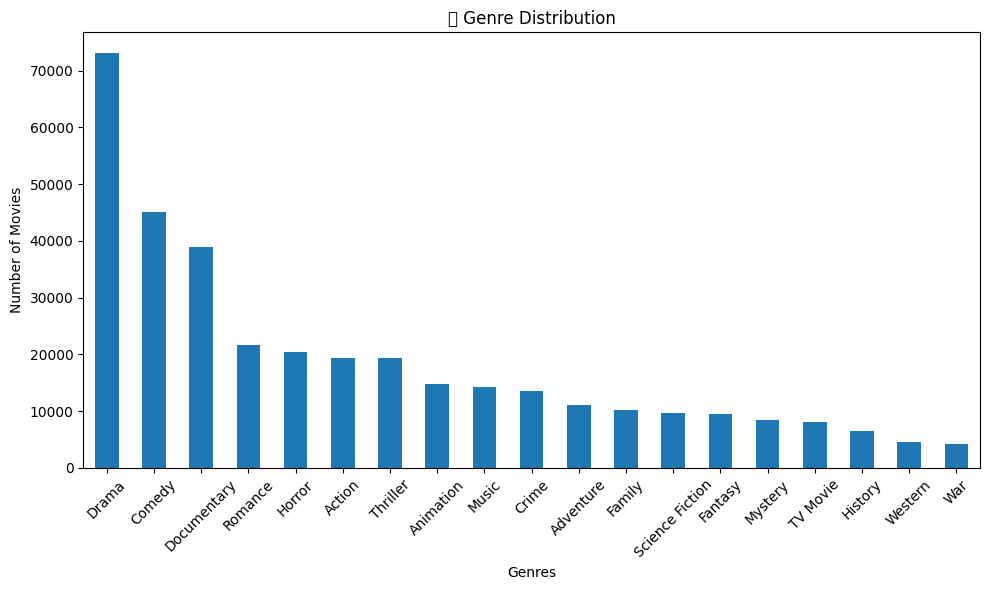

In [3]:
# Drop rows with missing genres or overview or poster_path
df_clean = df.dropna(subset=['genres', 'overview', 'poster_path'])
print("✅ After dropping rows with missing genres, overview, or poster_path:")
print(df_clean.shape)

import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert stringified list to actual list
# Safely split genre strings into list of genres
df_clean['genres'] = df_clean['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')] if pd.notnull(x) else [])

# Initialize binarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df_clean['genres'])

# Create DataFrame for genre labels
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)
df_clean = df_clean.reset_index(drop=True)
df_clean = pd.concat([df_clean, genre_df], axis=1)

print("🎯 Genres processed successfully. Genre classes:", mlb.classes_)



# Base URL for TMDb images
base_url = "https://image.tmdb.org/t/p/w500"

df_clean['poster_url'] = df_clean['poster_path'].apply(lambda x: f"{base_url}{x}")


df_clean.to_csv("data/cleaned_movie_dataset.csv", index=False)
print("💾 Cleaned dataset saved.")
# Save to CSV
df_clean.to_csv("data/cleaned_movie_dataset.csv", index=False)
print("💾 Dataset saved as 'cleaned_movie_dataset.csv'")


import matplotlib.pyplot as plt

genre_counts = df_clean['genres'].explode().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title("🎬 Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



🎬 Number of movies by number of genres assigned:
genre_count
1     100645
2      59751
3      29569
4       8023
5       1831
6        340
7         63
8          8
9          8
10         3
11         1
12         1
Name: count, dtype: int64


/var/folders/cy/2wgjb34j6s50fdgx2pfjk8zw0000gn/T/ipykernel_51403/3063578303.py:25: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/tf-macos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


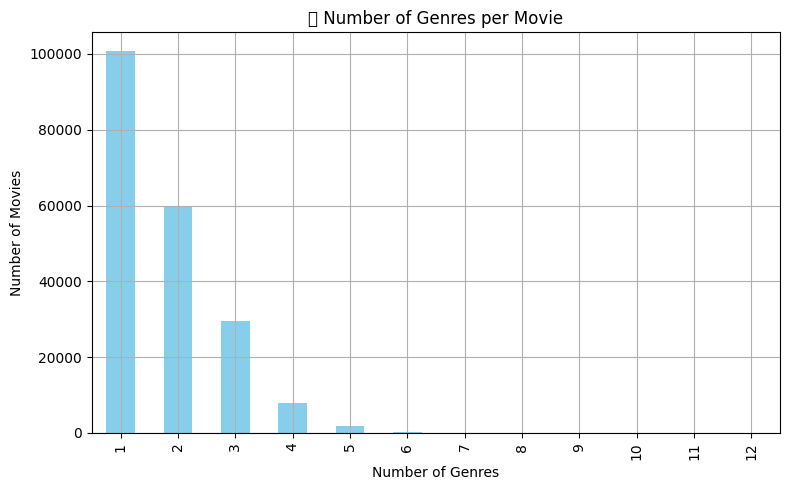

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Your one-hot genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
                 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Assuming df_clean already exists
df_clean['genre_count'] = df_clean[genre_columns].sum(axis=1)

# Distribution of genre counts per movie
genre_count_distribution = df_clean['genre_count'].value_counts().sort_index()

print("🎬 Number of movies by number of genres assigned:")
print(genre_count_distribution)

# Optional: Visualize it
plt.figure(figsize=(8, 5))
genre_count_distribution.plot(kind='bar', color='skyblue')
plt.title("🎭 Number of Genres per Movie")
plt.xlabel("Number of Genres")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()


🏆 Top 10 Genres Selected: ['Drama', 'Comedy', 'Documentary', 'Romance', 'Horror', 'Action', 'Thriller', 'Animation', 'Music', 'Crime']
✅ Balanced dataset saved as 'balanced_top10_genres.csv'
🎯 New shape: (124876, 25)
📊 Genre distribution:
 Drama          40489
Comedy         29250
Documentary    18119
Romance        20297
Horror         18399
Action         19234
Thriller       19338
Animation      14777
Music          14287
Crime          13564
dtype: int64


/var/folders/cy/2wgjb34j6s50fdgx2pfjk8zw0000gn/T/ipykernel_51403/1506978808.py:52: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/tf-macos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


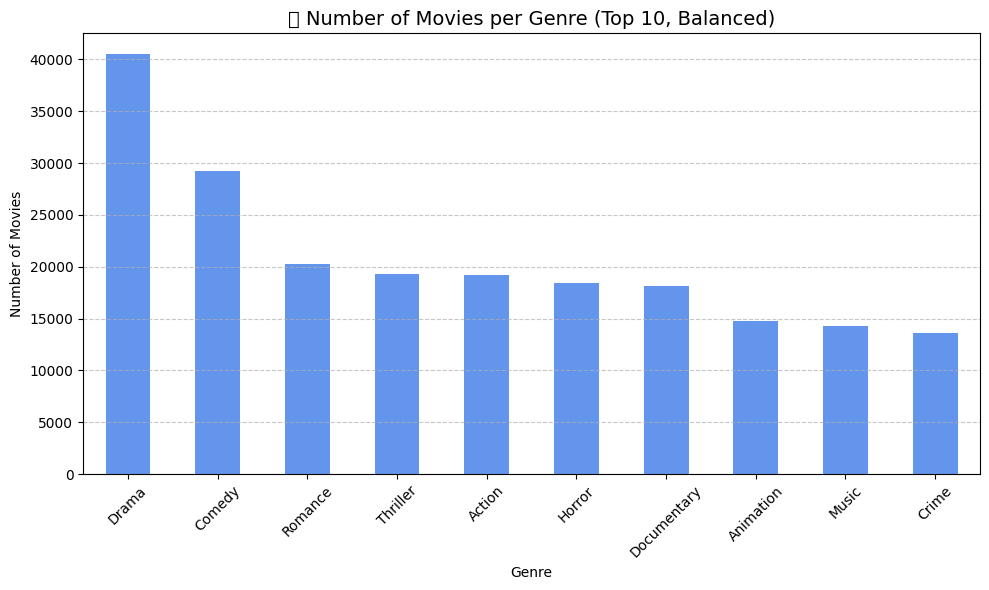

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your cleaned dataset
df_clean = pd.read_csv("data/cleaned_movie_dataset.csv")

# Step 2: Automatically determine top 10 genres by frequency
all_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
              'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Calculate total appearances per genre
genre_totals = df_clean[all_genres].sum().sort_values(ascending=False)
top_10_genres = genre_totals.head(10).index.tolist()
print("🏆 Top 10 Genres Selected:", top_10_genres)

# Step 3: Set max samples per genre
max_samples_per_genre = 15000

# Step 4: Balance the dataset
balanced_df = pd.DataFrame()
already_added_indices = set()

for genre in top_10_genres:
    genre_subset = df_clean[df_clean[genre] == 1]
    genre_subset = genre_subset[~genre_subset.index.isin(already_added_indices)]

    if len(genre_subset) > max_samples_per_genre:
        genre_subset = genre_subset.sample(n=max_samples_per_genre, random_state=42)

    already_added_indices.update(genre_subset.index)
    balanced_df = pd.concat([balanced_df, genre_subset])

balanced_df = balanced_df.drop_duplicates().reset_index(drop=True)

# Step 5: Save to CSV
balanced_df.to_csv("balanced_top10_genres.csv", index=False)
print("✅ Balanced dataset saved as 'balanced_top10_genres.csv'")
print("🎯 New shape:", balanced_df.shape)
print("📊 Genre distribution:\n", balanced_df[top_10_genres].sum())

# Step 6: Plot the genre distribution
genre_counts = balanced_df[top_10_genres].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='cornflowerblue')
plt.title("🎬 Number of Movies per Genre (Top 10, Balanced)", fontsize=14)
plt.ylabel("Number of Movies")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


✅ Saved as 'strictly_balanced_top10.csv'
🎯 Shape: (111630, 25)
📊 Genre counts:
 Drama          20000
Comedy         20000
Documentary    20000
Romance        12265
Horror         16710
Action         14596
Thriller       14738
Animation      12015
Music          10504
Crime           8608
dtype: int64


/var/folders/cy/2wgjb34j6s50fdgx2pfjk8zw0000gn/T/ipykernel_51403/2278364458.py:65: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/tf-macos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


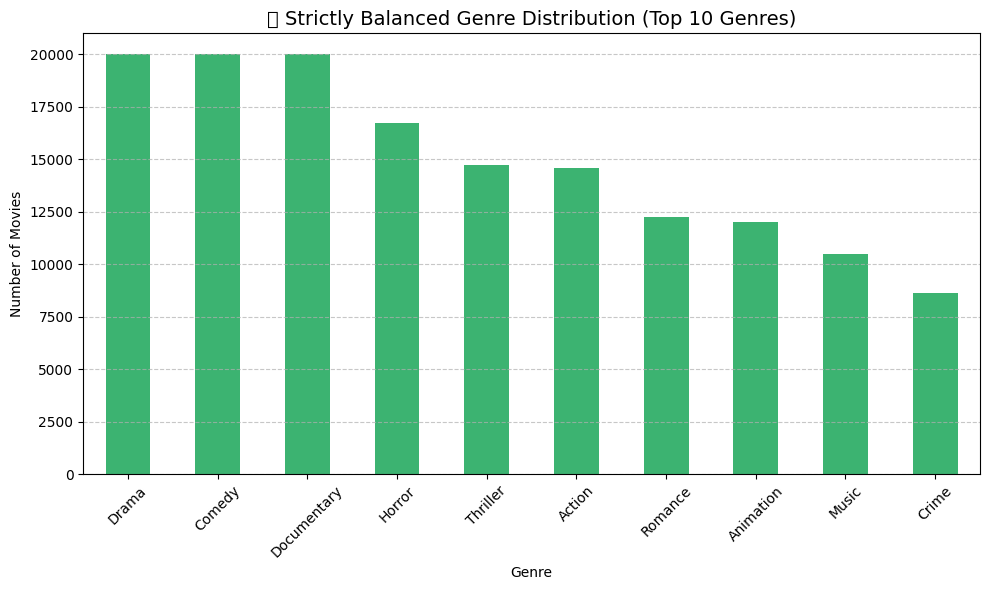

In [6]:
import pandas as pd

# Load your cleaned dataset
df_clean = pd.read_csv("data/cleaned_movie_dataset.csv")

# Determine top 10 genres
all_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
              'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

genre_totals = df_clean[all_genres].sum().sort_values(ascending=False)
top_10_genres = genre_totals.head(10).index.tolist()

# Target per genre
max_per_genre = 20000

# Tracker for how many movies we've kept per genre
genre_counter = {genre: 0 for genre in top_10_genres}
final_rows = []

# Iterate over the dataset row by row
for _, row in df_clean.iterrows():
    genres_in_row = [genre for genre in top_10_genres if row[genre] == 1]

    # Check if adding this row would overflow any genre
    if all(genre_counter[g] < max_per_genre for g in genres_in_row):
        final_rows.append(row)
        for g in genres_in_row:
            genre_counter[g] += 1

    # Stop early if all genre limits are reached
    if all(count >= max_per_genre for count in genre_counter.values()):
        break

# Final DataFrame
balanced_strict_df = pd.DataFrame(final_rows)

# Save
balanced_strict_df.to_csv("strictly_balanced_top10.csv", index=False)
print("✅ Saved as 'strictly_balanced_top10.csv'")
print("🎯 Shape:", balanced_strict_df.shape)
print("📊 Genre counts:\n", balanced_strict_df[top_10_genres].sum())

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the strictly balanced dataset
df_strict = pd.read_csv("strictly_balanced_top10.csv")

# Step 2: Define the top 10 genres (update if needed)
top_10_genres = ['Drama', 'Comedy', 'Romance', 'Thriller', 'Action',
                 'Horror', 'Documentary', 'Animation', 'Music', 'Crime']

# Step 3: Count the number of times each genre appears
genre_counts = df_strict[top_10_genres].sum().sort_values(ascending=False)

# Step 4: Plot the bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='mediumseagreen')
plt.title("🎯 Strictly Balanced Genre Distribution (Top 10 Genres)", fontsize=14)
plt.ylabel("Number of Movies")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waghr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\waghr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\waghr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    text = str(text).lower()                                # Lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)                 # Remove punctuation/symbols
    text = re.sub(r"\s+", " ", text).strip()                # Normalize whitespace
    tokens = nltk.word_tokenize(text)                       # Tokenize
    tokens = [t for t in tokens if t not in stop_words]     # Remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]      # Lemmatize
    return " ".join(tokens)






In [9]:
import pandas as pd

# Load your dataset
df = pd.read_csv("strictly_balanced_top10.csv")

# Clean the overviews
df['clean_overview'] = df['overview'].apply(clean_text_advanced)

# Preview
print(df[['overview', 'clean_overview']].head(3))

df.to_csv("strictly_balanced_top10_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'strictly_balanced_top10_cleaned.csv'")

                                            overview  \
0  Cobb, a skilled thief who commits corporate es...   
1  The adventures of a group of explorers who mak...   
2  Batman raises the stakes in his war on crime. ...   

                                      clean_overview  
0  cobb skilled thief commits corporate espionage...  
1  adventure group explorer make use newly discov...  
2  batman raise stake war crime help lt jim gordo...  
✅ Cleaned dataset saved as 'strictly_balanced_top10_cleaned.csv'


In [10]:
# Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Limit vocab to top 20,000 words
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_overview'])

# Convert overviews to sequences of tokens
sequences = tokenizer.texts_to_sequences(df['clean_overview'])

# Pad sequences to a max length (e.g., 200 tokens)
X_text = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

print("✅ Tokenized and padded text shape:", X_text.shape)

✅ Tokenized and padded text shape: (111630, 200)


In [11]:
# prepare label Matrix
# Define your top 10 genre columns
genre_columns = ['Drama', 'Comedy', 'Romance', 'Thriller', 'Action',
                 'Horror', 'Documentary', 'Animation', 'Music', 'Crime']

# Create the label matrix
import numpy as np
y_labels = df[genre_columns].values.astype('float32')

print("✅ Label matrix shape:", y_labels.shape)

✅ Label matrix shape: (111630, 10)


In [12]:
# Save the processed data
np.save("X_text.npy", X_text)
np.save("y_labels.npy", y_labels)
print("💾 Saved preprocessed data for modeling.")

💾 Saved preprocessed data for modeling.


In [13]:
#Load GloVe + Create Embedding Matrix
embedding_index = {}
with open("data/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f"✅ Loaded {len(embedding_index)} word vectors from GloVe.")

✅ Loaded 400000 word vectors from GloVe.


In [14]:
#Create Embedding Matrix for Your Tokenizer
embedding_dim = 100
vocab_size = min(20000, len(tokenizer.word_index) + 1)

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("✅ Embedding matrix shape:", embedding_matrix.shape)

✅ Embedding matrix shape: (20000, 100)


In [25]:
# Create  dataloaders for training and validation
# 1. Imports
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import pandas as pd

# 2. Load your saved arrays
X_text = np.load("X_text.npy")
y_labels = np.load("y_labels.npy")

# 3. Define Dataset class
class MovieGenreDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 4. Create dataset
dataset = MovieGenreDataset(X_text, y_labels)

# 5. Split into train/validation
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 6. Create DataLoaders (set num_workers=0 for Jupyter)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

print(f"📦 Train set: {len(train_dataset)} samples | Validation set: {len(val_dataset)} samples")

print(f"📦 Train: {len(train_dataset)} | Val: {len(val_dataset)}")

📦 Train set: 100467 samples | Validation set: 11163 samples
📦 Train: 100467 | Val: 11163


In [26]:
# PyTorch LSTM Model
import torch.nn as nn
import torch.nn.functional as F

class GenreLSTM(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim=128, dropout=0.3):
        super(GenreLSTM, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape

        # Embedding layer with pretrained GloVe weights
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False  # freeze embeddings

        # LSTM layer
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_dim,
                            batch_first=True,
                            bidirectional=True)

        self.dropout = nn.Dropout(dropout)

        # Fully connected layer to output genre logits
        self.fc = nn.Linear(hidden_dim * 2, 10)  # *2 for bidirectional

    def forward(self, x):
        embedded = self.embedding(x)         # [B, 200, 100]
        lstm_out, _ = self.lstm(embedded)    # [B, 200, 256]
        pooled = torch.mean(lstm_out, dim=1) # average over time steps
        dropped = self.dropout(pooled)
        output = self.fc(dropped)            # [B, 10] (genre logits)
        return output


In [27]:
# Training Loop Setup
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

# Instantiate model
model = GenreLSTM(embedding_matrix)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


📚 Epoch 1/10 | Train Loss: 0.2497 | Train Micro-F1: 0.4953 | Val Loss: 0.2520 | Val Micro-F1: 0.4904
📚 Epoch 2/10 | Train Loss: 0.2425 | Train Micro-F1: 0.5214 | Val Loss: 0.2478 | Val Micro-F1: 0.5084
📚 Epoch 3/10 | Train Loss: 0.2357 | Train Micro-F1: 0.5411 | Val Loss: 0.2462 | Val Micro-F1: 0.5208
📚 Epoch 4/10 | Train Loss: 0.2297 | Train Micro-F1: 0.5600 | Val Loss: 0.2446 | Val Micro-F1: 0.5436
📚 Epoch 5/10 | Train Loss: 0.2242 | Train Micro-F1: 0.5775 | Val Loss: 0.2441 | Val Micro-F1: 0.5418
📚 Epoch 6/10 | Train Loss: 0.2184 | Train Micro-F1: 0.5935 | Val Loss: 0.2431 | Val Micro-F1: 0.5295
📚 Epoch 7/10 | Train Loss: 0.2130 | Train Micro-F1: 0.6075 | Val Loss: 0.2455 | Val Micro-F1: 0.5609
📚 Epoch 8/10 | Train Loss: 0.2076 | Train Micro-F1: 0.6230 | Val Loss: 0.2450 | Val Micro-F1: 0.5491
📚 Epoch 9/10 | Train Loss: 0.2028 | Train Micro-F1: 0.6340 | Val Loss: 0.2469 | Val Micro-F1: 0.5523
📚 Epoch 10/10 | Train Loss: 0.1979 | Train Micro-F1: 0.6463 | Val Loss: 0.2520 | Val Micro-

/var/folders/cy/2wgjb34j6s50fdgx2pfjk8zw0000gn/T/ipykernel_51403/2704935085.py:98: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/cy/2wgjb34j6s50fdgx2pfjk8zw0000gn/T/ipykernel_51403/2704935085.py:98: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/tf-macos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/tf-macos/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


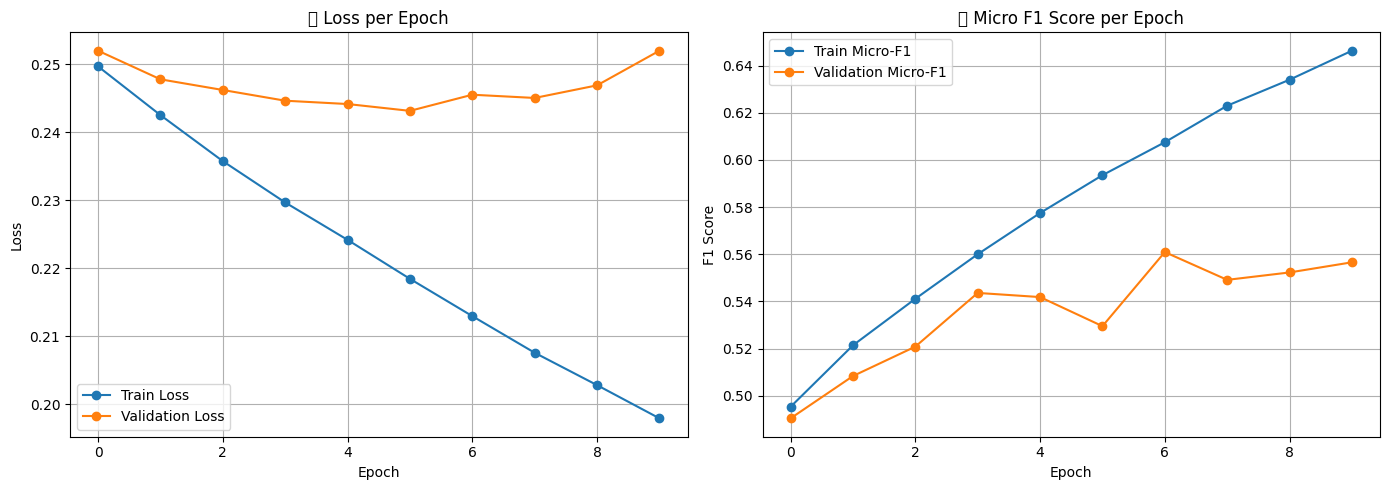

In [30]:
# Training Loop with Validation
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

# Set device
device = torch.device('cpu')
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store losses and F1 scores
train_losses = []
val_losses = []
train_micro_f1s = []
val_micro_f1s = []

def train_model_collect(model, train_loader, val_loader, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        all_y_true = []
        all_y_pred = []

        for batch in train_loader:
            X_batch, y_batch = [b.to(device) for b in batch]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().detach().numpy()
            all_y_true.extend(y_batch.cpu().numpy())
            all_y_pred.extend((preds >= 0.5).astype(int))

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        train_micro = f1_score(all_y_true, all_y_pred, average='micro')
        train_micro_f1s.append(train_micro)

        # Validation
        val_loss, val_micro = validate_model_collect(model, val_loader)
        val_losses.append(val_loss)
        val_micro_f1s.append(val_micro)

        print(f"📚 Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Train Micro-F1: {train_micro:.4f} | Val Loss: {val_loss:.4f} | Val Micro-F1: {val_micro:.4f}")

def validate_model_collect(model, val_loader):
    model.eval()
    running_loss = 0
    all_y_true = []
    all_y_pred = []

    with torch.no_grad():
        for batch in val_loader:
            X_batch, y_batch = [b.to(device) for b in batch]
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy()
            all_y_true.extend(y_batch.cpu().numpy())
            all_y_pred.extend((preds >= 0.5).astype(int))

    avg_val_loss = running_loss / len(val_loader)
    val_micro = f1_score(all_y_true, all_y_pred, average='micro')
    return avg_val_loss, val_micro

def final_plot_losses_and_f1s(train_losses, val_losses, train_f1s, val_f1s):
    plt.figure(figsize=(14, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss", marker='o')
    plt.plot(val_losses, label="Validation Loss", marker='o')
    plt.title("📉 Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    # F1 plot
    plt.subplot(1, 2, 2)
    plt.plot(train_f1s, label="Train Micro-F1", marker='o')
    plt.plot(val_f1s, label="Validation Micro-F1", marker='o')
    plt.title("📈 Micro F1 Score per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Start Training
train_model_collect(model, train_loader, val_loader, epochs=10)
final_plot_losses_and_f1s(train_losses, val_losses, train_micro_f1s, val_micro_f1s)



In [7]:
# Save trained model
torch.save(model.state_dict(), "genre_classifier.pth")
print("✅ Model weights saved as 'genre_classifier.pth'")

# Save the Tokenizer using Pickle
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Tokenizer saved as 'tokenizer.pickle'")


NameError: name 'model' is not defined

In [35]:
# Load the tokenizer
import pickle

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print("✅ Tokenizer loaded successfully!")


✅ Tokenizer loaded successfully!


In [47]:
# Unknown text example
unknown_text = "Two brothers are torn apart after they steal a bag of money and are hunted down by a ruthless killer."

# Preprocess
sequence = tokenizer.texts_to_sequences([unknown_text])
padded_sequence = pad_sequences(sequence, maxlen=200, padding='post', truncating='post')

input_tensor = torch.tensor(padded_sequence, dtype=torch.long)

# Predict
with torch.no_grad():
    output_logits = model(input_tensor)
    preds = torch.sigmoid(output_logits).numpy()

# Map predictions to genre names
genre_columns = ['Drama', 'Comedy', 'Romance', 'Thriller', 'Action',
                 'Horror', 'Documentary', 'Animation', 'Music', 'Crime']

import numpy as np

top_N = 3  # Pick top 3 genres
top_indices = np.argsort(preds[0])[-top_N:][::-1]

predicted_genres = [genre_columns[i] for i in top_indices]

print(f"🎬 Top-{top_N} Predicted Genres:", predicted_genres)

🎬 Top-3 Predicted Genres: ['Action', 'Comedy', 'Thriller']


In [8]:
# --- 1. Import necessary libraries ---
import torch
import torch.nn as nn
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- 2. Load Tokenizer ---
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print("✅ Tokenizer loaded!")

# --- 3. Load Embedding Matrix ---
embedding_matrix = np.load('embedding_matrix.npy')

print("✅ Embedding matrix loaded!")

# --- 4. Define Your Genre Columns (Top 10 Genres) ---
genre_columns = ['Drama', 'Comedy', 'Romance', 'Thriller', 'Action',
                 'Horror', 'Documentary', 'Animation', 'Music', 'Crime']

# --- 5. Define the GenreLSTM Model Class ---
class GenreLSTM(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim=128, dropout=0.3):
        super(GenreLSTM, self).__init__()
        vocab_size, embedding_dim = embedding_matrix.shape

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False  # freeze embeddings

        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_dim,
                            batch_first=True,
                            bidirectional=True)

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, 10)  # 10 genres

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        pooled = torch.mean(lstm_out, dim=1)
        dropped = self.dropout(pooled)
        output = self.fc(dropped)
        return output

print("✅ Model architecture ready!")

# --- 6. Load Saved Model Weights ---
model = GenreLSTM(embedding_matrix)
model.load_state_dict(torch.load('genre_classifier.pth', map_location=torch.device('cpu')))
model.eval()

print("✅ Text genre model loaded and ready for prediction!")


✅ Tokenizer loaded!


FileNotFoundError: [Errno 2] No such file or directory: 'embedding_matrix.npy'

In [ ]:
['# Load the dataset',
 '# Basic shape and structure',
 '# Missing values',
 '# Keep only the essential columns',
 '# Drop rows where any of these essential columns are missing',
 '# Reset index',
 '# Show final shape and sample',
 '# Missing values',
 '# Drop rows with missing genres or overview or poster_path',
 '# Convert stringified list to actual list',
 '# Safely split genre strings into list of genres',
 '# Initialize binarizer',
 '# Create DataFrame for genre labels',
 '# Base URL for TMDb images',
 '# Save to CSV',
 '# Your one-hot genre columns',
 '# Assuming df_clean already exists',
 '# Distribution of genre counts per movie',
 '# Optional: Visualize it',
 '# Step 1: Load your cleaned dataset',
 '# Step 2: Automatically determine top 10 genres by frequency',
 '# Calculate total appearances per genre',
 '# Step 3: Set max samples per genre',
 '# Step 4: Balance the dataset',
 '# Step 5: Save to CSV',
 '# Step 6: Plot the genre distribution',
 '# Load your cleaned dataset',
 '# Determine top 10 genres',
 '# Target per genre',
 "# Tracker for how many movies we've kept per genre"]